# Area Plots

C:\Users\ahmedramadan\Miniconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")
C:\Users\ahmedramadan\Miniconda3\lib\site-packages\pandas\util\_decorators.py:178: FutureWarning: the 'skip_footer' keyword is deprecated, use 'skipfooter' instead
  return func(*args, **kwargs)


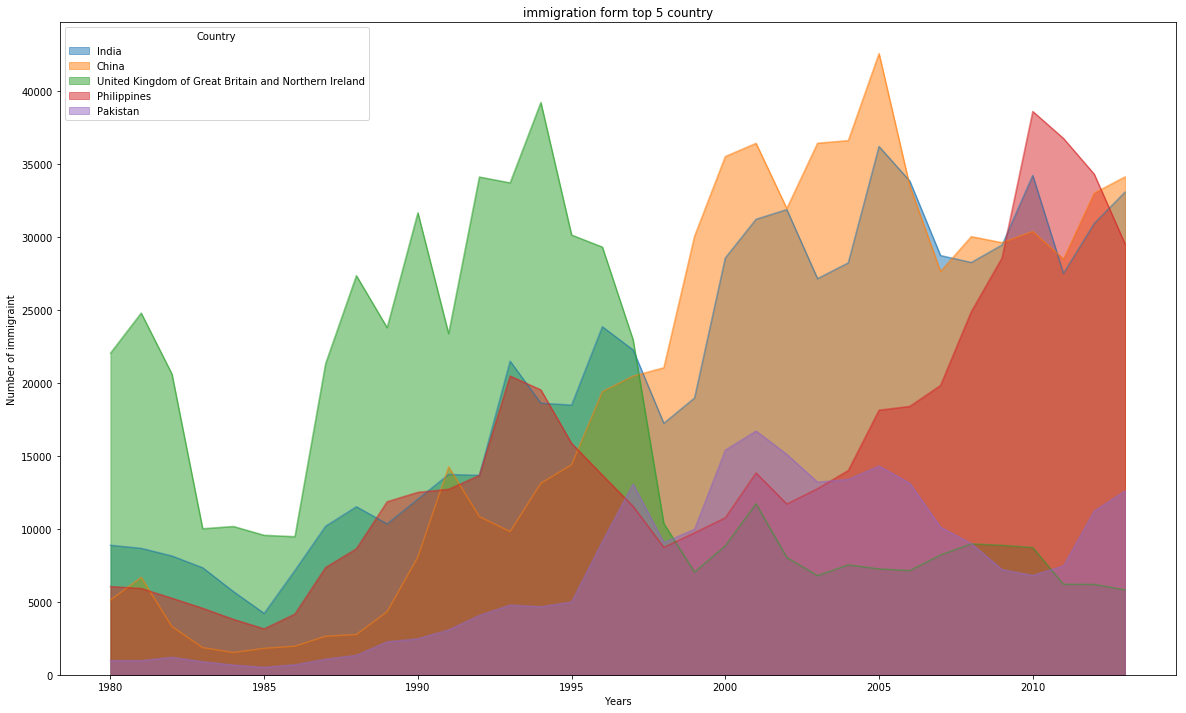

In [1]:
#import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as  np   #  scientfic computing (ndarray library) 
import pandas as pd   #  data structure tool using to mainpulate and anysis dataset


#read dataset from excel sheet
df_can = pd.read_excel('./../week1/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skip_footer=2)

#preprocessing data

# in pandas axis=0 represents rows (default) and axis=1 represents columns.

df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
 
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
 
df_can.columns = list(map(str, df_can.columns))
 
df_can.set_index('Country', inplace=True)   
 
df_can['Total'] = df_can.sum(axis=1) # add new column to sum number of immigraints for each counry



years = list( map ( str , range(1980,2014) ) ) 

df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)

df_top5 = df_can.head(5)

df_top5 = df_top5[years].transpose()

df_top5.index = df_top5.index.map(int) # Test this cell without/with this line to see the difference [convert string year to int]

df_top5.plot(kind='area' , stacked = False  ,figsize=(20,12)) 
plt.title('immigration form top 5 country') #add title of plot
plt.xlabel('Years') #add xlabel text
plt.ylabel('Number of immigraint')  # add ylabel text
plt.savefig('immigration form 5 top country using area plot.png') #to save the figure locally  in your machine
plt.show()

# Histogram

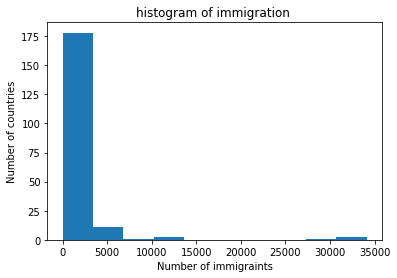

In [2]:
df_can['2013'].plot(kind='hist')

plt.title('histogram of immigration ') #add title of plot
plt.xlabel('Number of immigraints') #add xlabel text
plt.ylabel('Number of countries')  # add ylabel text
plt.savefig('immigration Histogram.png') #to save the figure locally  in your machine
plt.show()

# the immigration distribution for Denmark, Norway, and Sweden for years 1980 – 2013

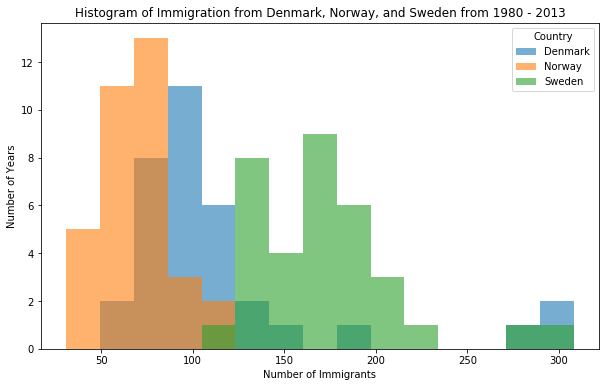

In [7]:

# transpose dataframe

df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
 
# generate histogram
df_t.plot(kind='hist', figsize=(10, 6) , bins=15 ,alpha=0.6)
 
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')
plt.savefig('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013.png') #to save the figure locally  in your machine

plt.show()

# Bar chart

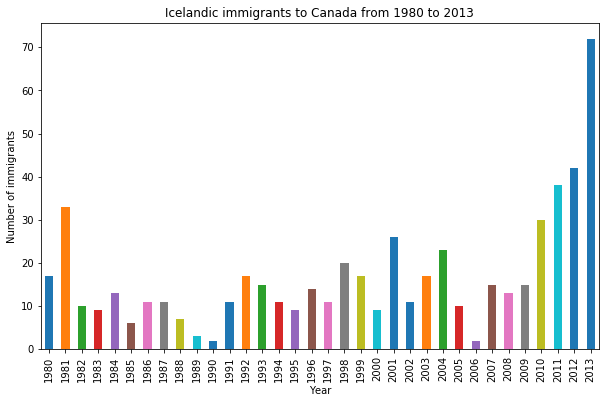

In [8]:

df_iceland = df_can.loc['Iceland', years]

df_iceland.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.savefig('Icelandic immigrants to Canada from 1980 to 2013') #to save the figure locally  in your machine

plt.show()


# Pie chart

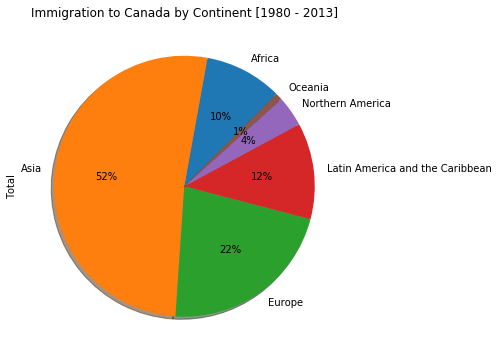

In [53]:
# group countries by continents and apply sum() function 
df_continents = df_can.groupby('Continent', axis=0).sum()

# autopct create %, start angle represent starting point
df_continents['Total'].plot(kind='pie',
                            figsize=(8, 6),
                            autopct='%1.f%%', # add in percentages
                            startangle=45,     # start angle 45° 
                            shadow=True,       # add shadow  (to give a 3D feel)    
                            )
 
plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.savefig('Immigration to Canada by Continent [1980 - 2013].png')
plt.show()

# Box plot

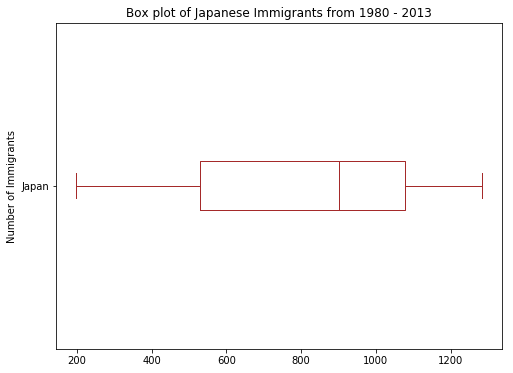

In [62]:
# to get a dataframe, place extra square brackets around 'Japan'.
df_japan = df_can.loc[['Japan'], years].transpose()


df_japan.plot(kind='box', vert=False ,color='brown' ,figsize=(8, 6))
 
plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')
plt.savefig('Box plot of Japanese Immigrants from 1980 - 2013.png') 
plt.show()




# Scatter

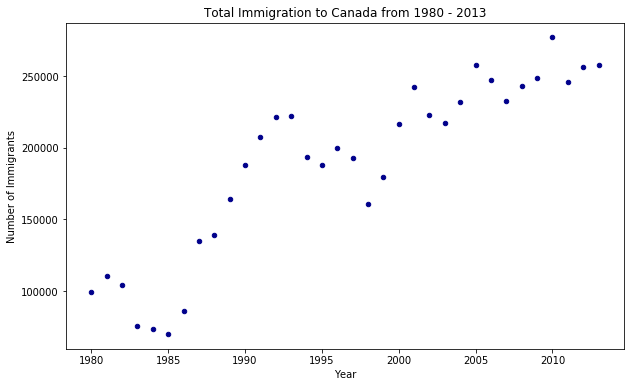

In [64]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']



 
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')
 
plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.savefig('scatter Total Immigration to Canada from 1980 - 2013.png')
plt.show()